<a href="https://colab.research.google.com/github/Pruthvik-Reddy/Statistical-Data-Analysis-sem5-Project/blob/master/sda_air_quality_uci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:

data = pd.read_excel("/content/drive/My Drive/sda/AirQualityUCI.xlsx")


In [104]:
data.head()

Date      Time  CO(GT)  ...      T         RH        AH
0 2004-03-10  18:00:00     2.6  ...  13.60  48.875001  0.757754
1 2004-03-10  19:00:00     2.0  ...  13.30  47.700000  0.725487
2 2004-03-10  20:00:00     2.2  ...  11.90  53.975000  0.750239
3 2004-03-10  21:00:00     2.2  ...  11.00  60.000000  0.786713
4 2004-03-10  22:00:00     1.6  ...  11.15  59.575001  0.788794

[5 rows x 15 columns]

In [105]:
data.shape

(9357, 15)

In [106]:
data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [107]:
data.describe(include="all")

Date      Time  ...           RH           AH
count                  9357      9357  ...  9357.000000  9357.000000
unique                  391        24  ...          NaN          NaN
top     2004-09-07 00:00:00  01:00:00  ...          NaN          NaN
freq                     24       390  ...          NaN          NaN
first   2004-03-10 00:00:00       NaN  ...          NaN          NaN
last    2005-04-04 00:00:00       NaN  ...          NaN          NaN
mean                    NaN       NaN  ...    39.483611    -6.837604
std                     NaN       NaN  ...    51.215645    38.976670
min                     NaN       NaN  ...  -200.000000  -200.000000
25%                     NaN       NaN  ...    34.050000     0.692275
50%                     NaN       NaN  ...    48.550000     0.976823
75%                     NaN       NaN  ...    61.875000     1.296223
max                     NaN       NaN  ...    88.725000     2.231036

[13 rows x 15 columns]

In [108]:
data.replace([-200],[np.nan],inplace=True)

In [109]:
data.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

Text(0.5, 1.0, 'No. Null values in dataset')

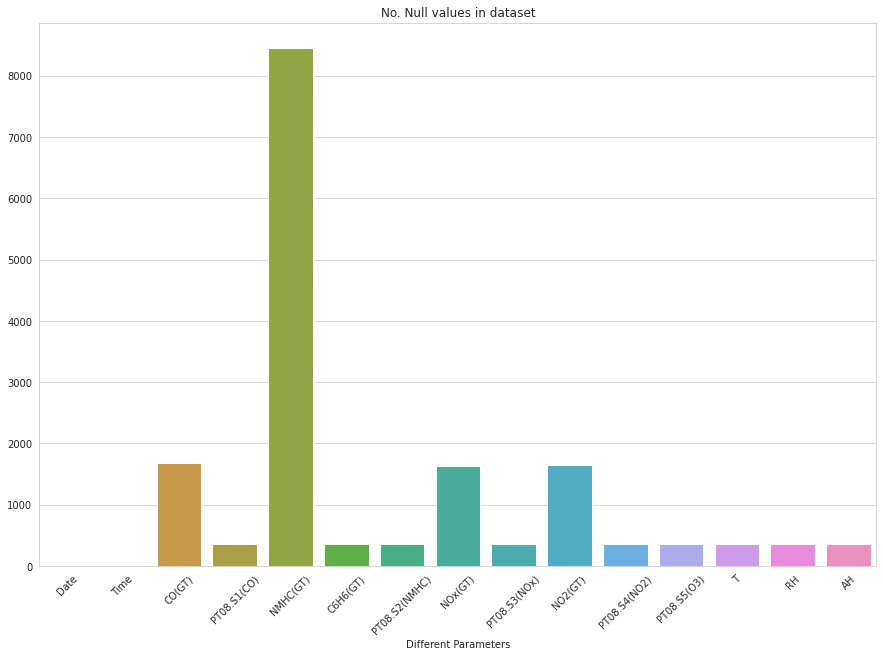

In [110]:
plt.figure(figsize=(15,10))
sns.barplot(x = data.columns, y = list(map(lambda x : data[x].isnull().sum(),data.columns) ))
plt.xticks(rotation = 45)
plt.xlabel("Different Parameters")
plt.title("No. Null values in dataset")

In [111]:
data.drop(['NMHC(GT)'],axis=1,inplace = True)
data.shape

(9357, 14)

In [112]:
data.describe(include="all")

Date      Time  ...           RH           AH
count                  9357      9357  ...  8991.000000  8991.000000
unique                  391        24  ...          NaN          NaN
top     2004-09-07 00:00:00  01:00:00  ...          NaN          NaN
freq                     24       390  ...          NaN          NaN
first   2004-03-10 00:00:00       NaN  ...          NaN          NaN
last    2005-04-04 00:00:00       NaN  ...          NaN          NaN
mean                    NaN       NaN  ...    49.232360     1.025530
std                     NaN       NaN  ...    17.316389     0.403813
min                     NaN       NaN  ...     9.175000     0.184679
25%                     NaN       NaN  ...    35.812500     0.736769
50%                     NaN       NaN  ...    49.550000     0.995395
75%                     NaN       NaN  ...    62.500001     1.313701
max                     NaN       NaN  ...    88.725000     2.231036

[13 rows x 14 columns]

In [113]:
data.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   C6H6(GT)       8991 non-null   float64       
 5   PT08.S2(NMHC)  8991 non-null   float64       
 6   NOx(GT)        7718 non-null   float64       
 7   PT08.S3(NOx)   8991 non-null   float64       
 8   NO2(GT)        7715 non-null   float64       
 9   PT08.S4(NO2)   8991 non-null   float64       
 10  PT08.S5(O3)    8991 non-null   float64       
 11  T              8991 non-null   float64       
 12  RH             8991 non-null   float64       
 13  AH             8991 non-null   float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 1023.5+ KB


In [115]:
data['DateTime'] = data['Date'].astype('str')+' '+data['Time'].astype('str')
data['DateTime'] = pd.to_datetime(data['DateTime'].astype('str'),format = "%Y/%m/%d %H:%M:%S")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   C6H6(GT)       8991 non-null   float64       
 5   PT08.S2(NMHC)  8991 non-null   float64       
 6   NOx(GT)        7718 non-null   float64       
 7   PT08.S3(NOx)   8991 non-null   float64       
 8   NO2(GT)        7715 non-null   float64       
 9   PT08.S4(NO2)   8991 non-null   float64       
 10  PT08.S5(O3)    8991 non-null   float64       
 11  T              8991 non-null   float64       
 12  RH             8991 non-null   float64       
 13  AH             8991 non-null   float64       
 14  DateTime       9357 non-null   datetime64[ns]
dtypes: datetime64[ns](2),

In [116]:
year = list(map(lambda x : x.year,data['DateTime']))
data['year'] = pd.DataFrame(year)
data['month'] = data.DateTime.dt.to_period('m')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   C6H6(GT)       8991 non-null   float64       
 5   PT08.S2(NMHC)  8991 non-null   float64       
 6   NOx(GT)        7718 non-null   float64       
 7   PT08.S3(NOx)   8991 non-null   float64       
 8   NO2(GT)        7715 non-null   float64       
 9   PT08.S4(NO2)   8991 non-null   float64       
 10  PT08.S5(O3)    8991 non-null   float64       
 11  T              8991 non-null   float64       
 12  RH             8991 non-null   float64       
 13  AH             8991 non-null   float64       
 14  DateTime       9357 non-null   datetime64[ns]
 15  year           9357 n

In [117]:
data.isna().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
DateTime            0
year                0
month               0
dtype: int64

In [118]:
data['T'] = data.groupby(['Date'])['T'].apply(lambda x : x.fillna(x.mean()))
data['RH'] = data.groupby(['Date'])['RH'].apply(lambda x : x.fillna(x.mean()))
data['AH'] = data.groupby(['Date'])['AH'].apply(lambda x : x.fillna(x.mean()))
data['CO(GT)'] = data.groupby(['Date'])['CO(GT)'].apply(lambda x : x.fillna(x.mean()))
data['NOx(GT)'] = data.groupby(['Date'])['NOx(GT)'].apply(lambda x : x.fillna(x.mean()))
data['NO2(GT)'] = data.groupby(['Date'])['NO2(GT)'].apply(lambda x : x.fillna(x.mean()))

In [119]:
data.isna().sum()

Date               0
Time               0
CO(GT)           864
PT08.S1(CO)      366
C6H6(GT)         366
PT08.S2(NMHC)    366
NOx(GT)          816
PT08.S3(NOx)     366
NO2(GT)          816
PT08.S4(NO2)     366
PT08.S5(O3)      366
T                192
RH               192
AH               192
DateTime           0
year               0
month              0
dtype: int64

In [120]:
data.fillna(method='ffill',inplace=True)

In [121]:
data.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
DateTime         0
year             0
month            0
dtype: int64

In [123]:
data.describe(include="all")
dataset=data.copy()

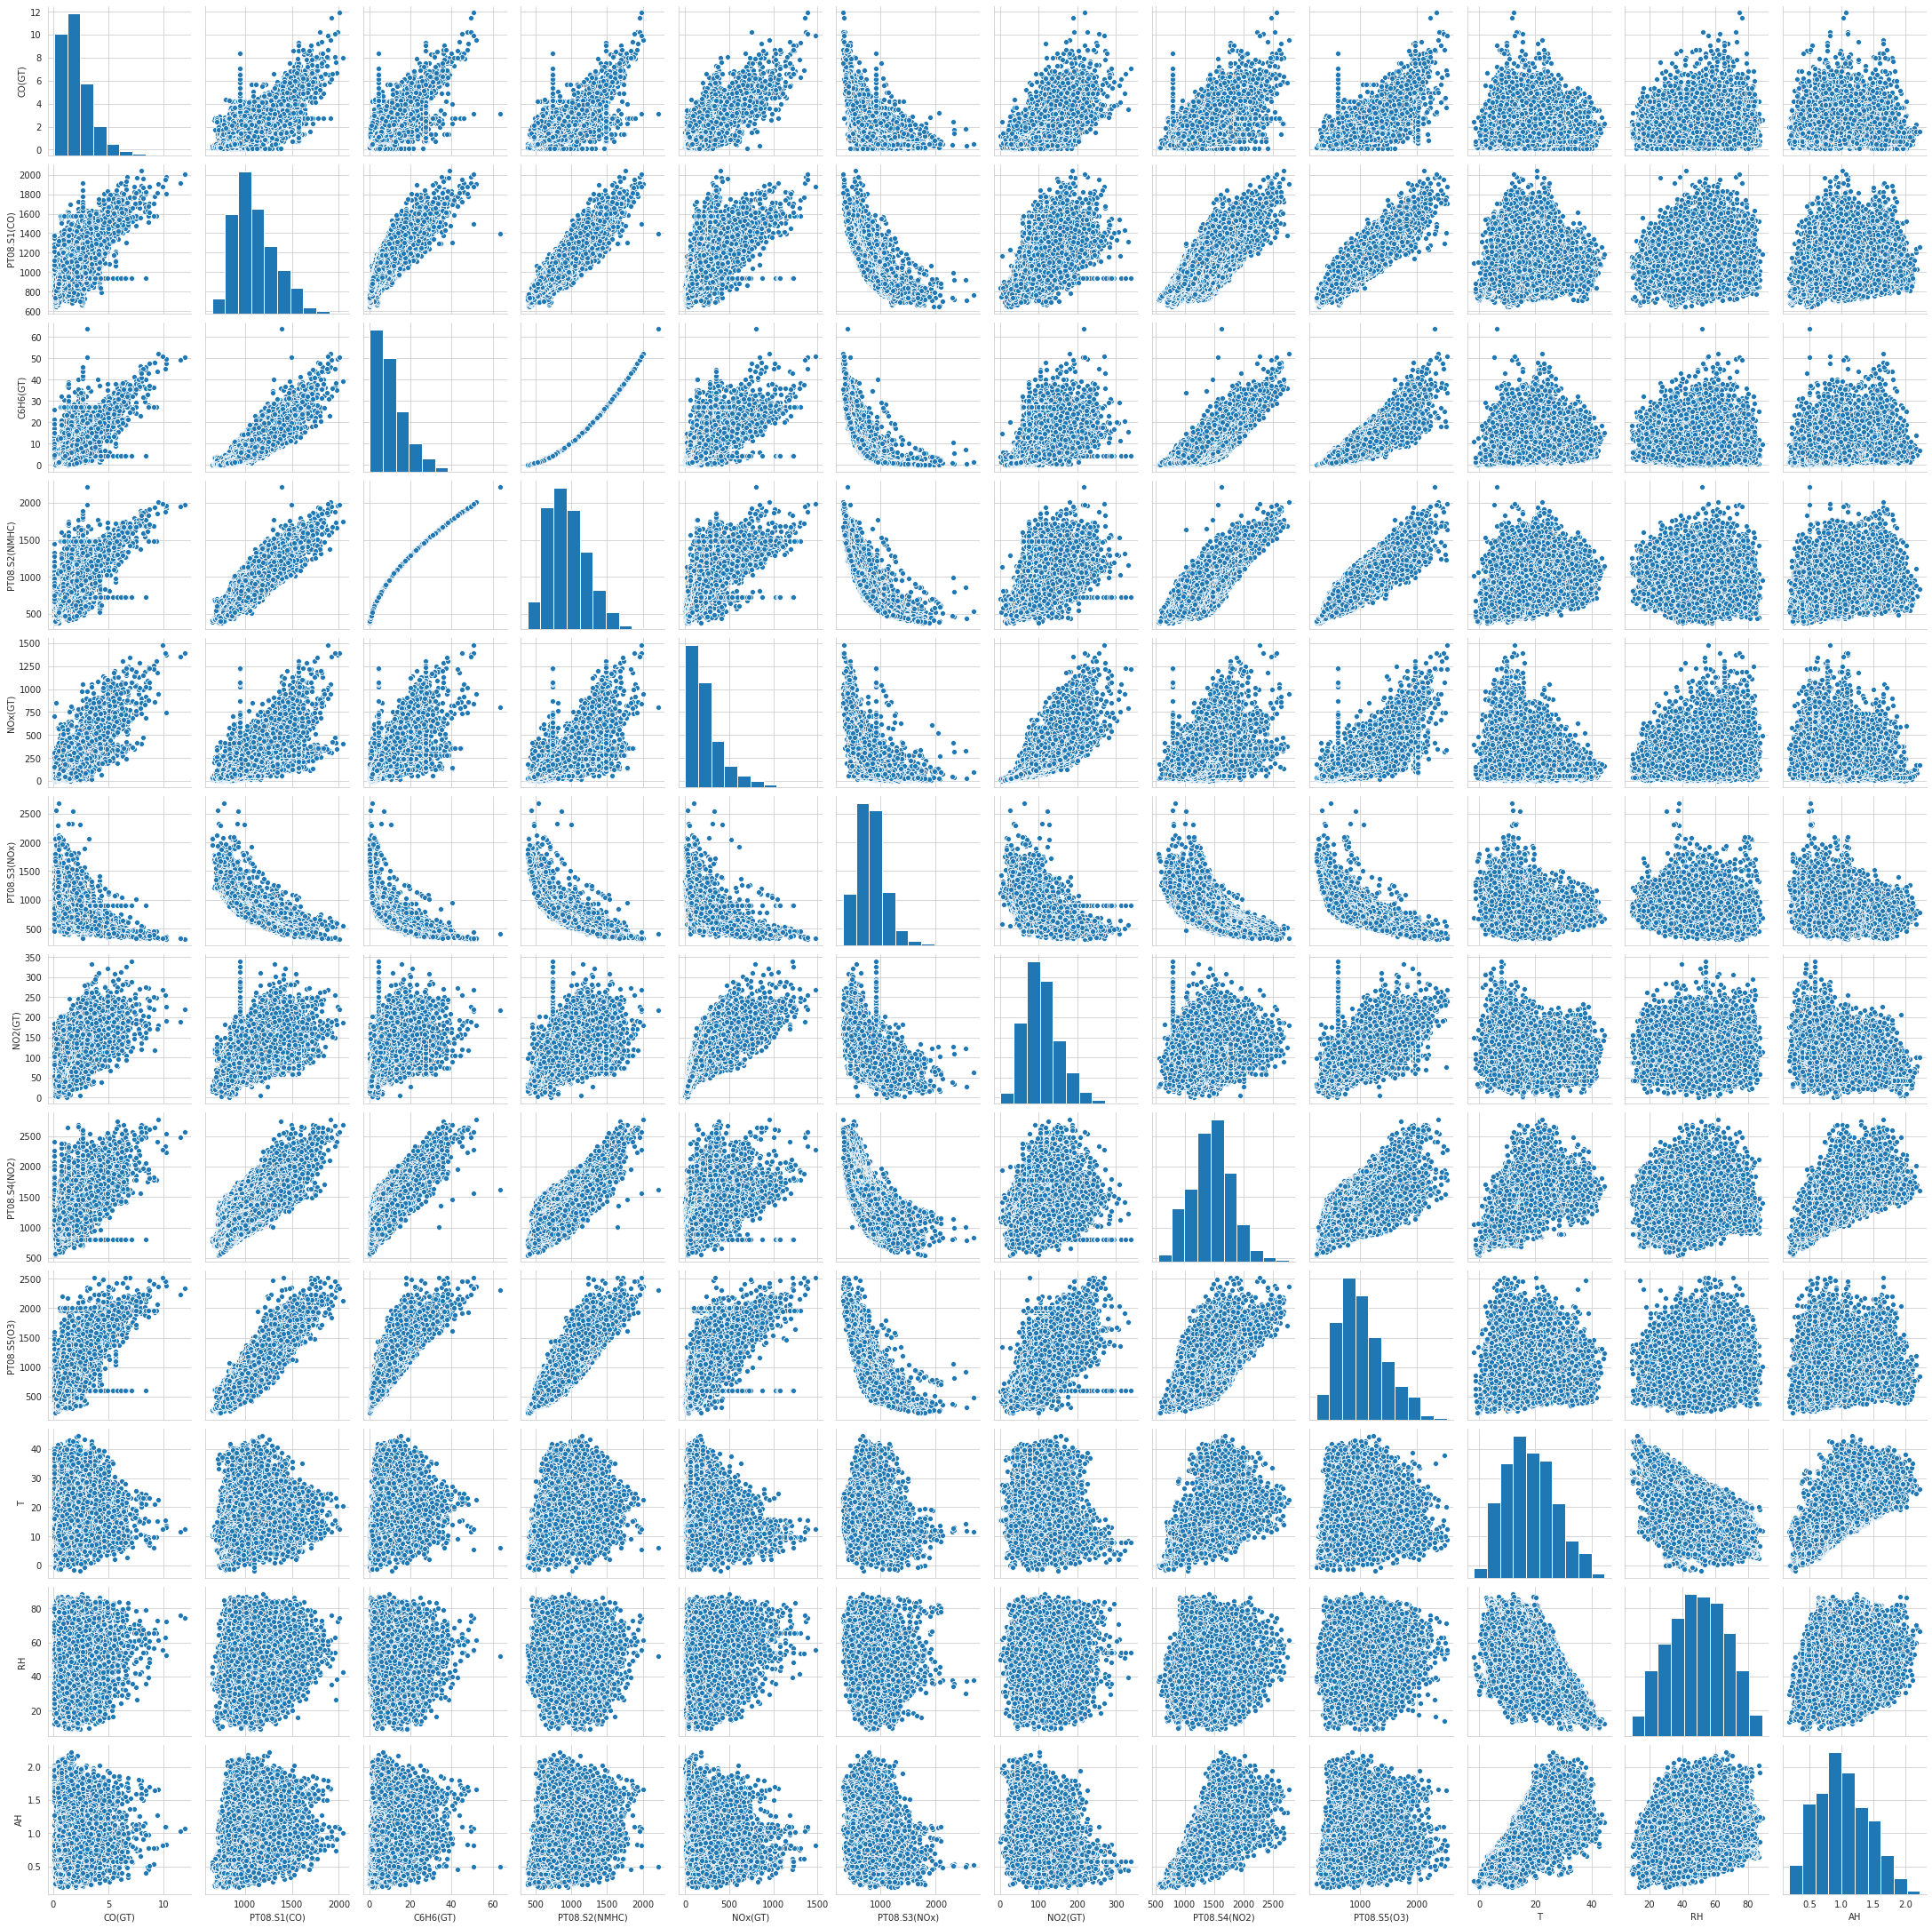

In [124]:

sns.set_style('whitegrid')
eda_data = data.drop(['Time','year','month'], axis=1)
sns.pairplot(eda_data)

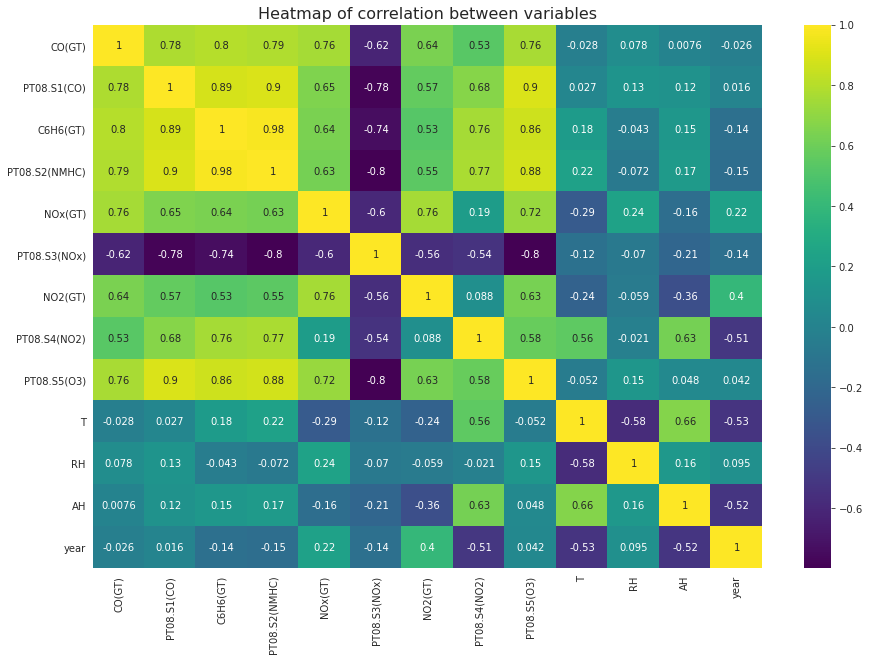

In [73]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of correlation between variables',fontsize=16)
plt.xticks(rotation = 90)
plt.show()

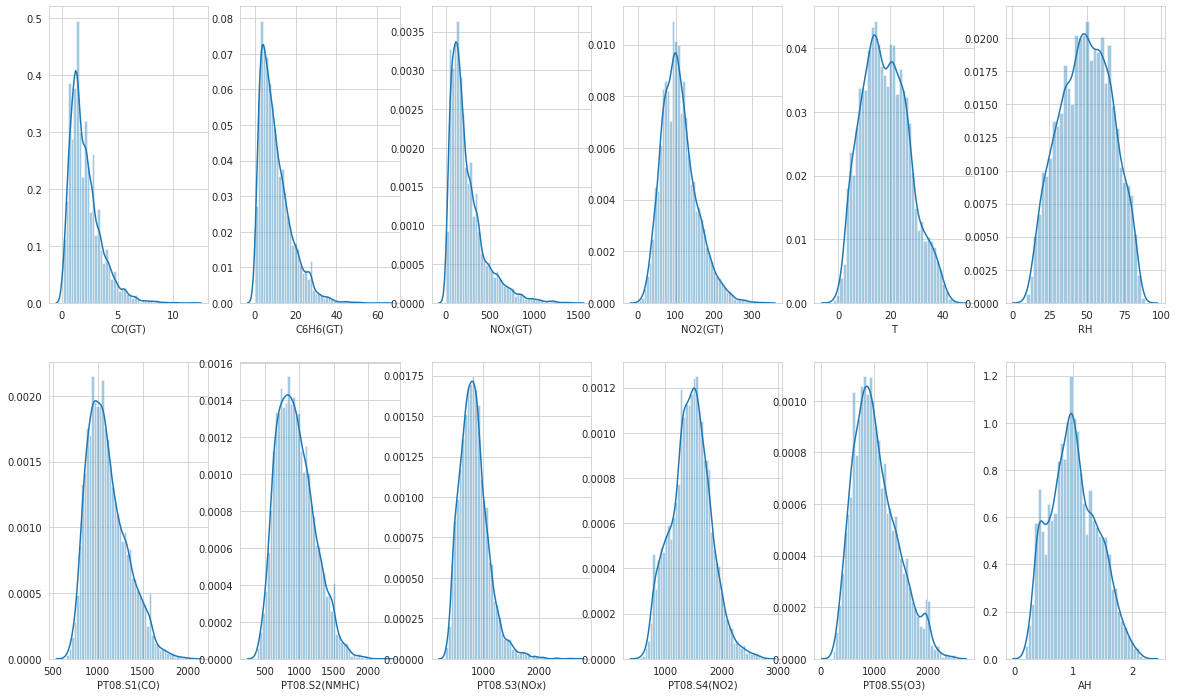

In [74]:
fig ,axes = plt.subplots(2,6,figsize = (20,12)) 
sns.distplot(data['CO(GT)'],ax=axes[0][0])
sns.distplot(data['PT08.S1(CO)'],ax=axes[1][0])
sns.distplot(data['PT08.S2(NMHC)'],ax=axes[1][1])
sns.distplot(data['C6H6(GT)'],ax=axes[0][1])
sns.distplot(data['NOx(GT)'],ax = axes[0][2])
sns.distplot(data['NO2(GT)'],ax = axes[0][3])
sns.distplot(data['PT08.S3(NOx)'],ax = axes[1][2])
sns.distplot(data['PT08.S4(NO2)'],ax = axes[1][3])
sns.distplot(data['PT08.S5(O3)'],ax = axes[1][4])
sns.distplot(data['T'],ax = axes[0][4])
sns.distplot(data['RH'],ax=axes[0][5])
sns.distplot(data['AH'],ax=axes[1][5])

fig.show()

Text(0.5, 1.0, 'Increase or Decrease of Concentration of AH across the month')

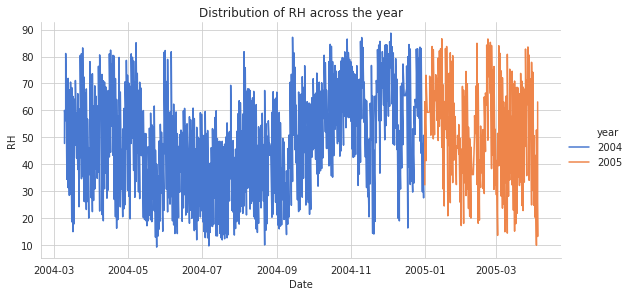

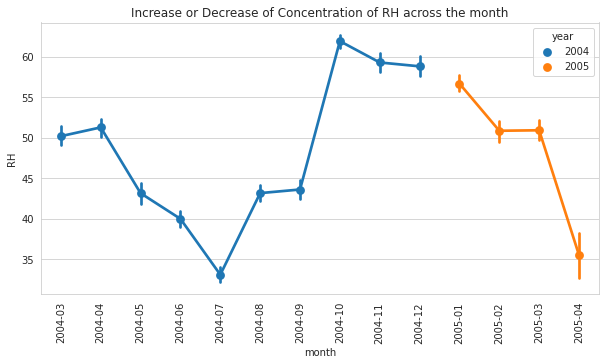

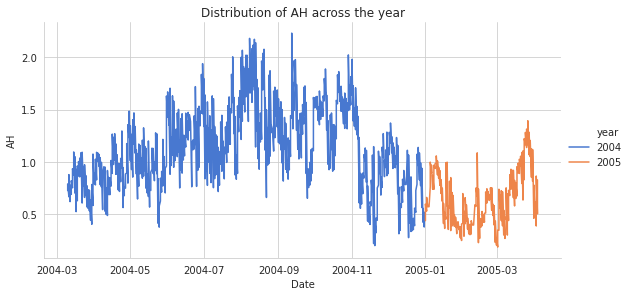

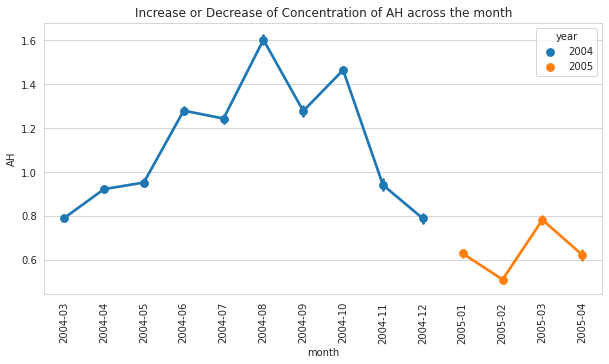

In [75]:
sns.relplot(x = "Date",y="RH",kind="line",estimator = None,hue = "year",palette=sns.color_palette("muted",n_colors = 2),data = data,height = 4,aspect = 2)
plt.title('Distribution of RH across the year')

plt.figure(figsize=(10,5))
sns.pointplot(x = "month", y= "RH", kind = "line",hue = "year",data=data)
plt.xticks(rotation =90)
plt.title("Increase or Decrease of Concentration of RH across the month")

sns.relplot(x = "Date",y="AH",kind="line",estimator = None,hue = "year",palette=sns.color_palette("muted",n_colors = 2),data = data,height = 4 ,aspect = 2)
plt.title('Distribution of AH across the year')

plt.figure(figsize=(10,5))
sns.pointplot(x = "month", y= "AH", kind = "line",hue = "year",data=data)
plt.xticks(rotation =90)
plt.title("Increase or Decrease of Concentration of AH across the month")


Index(['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH'],
      dtype='object')
Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'DateTime', 'year', 'month'],
      dtype='object')


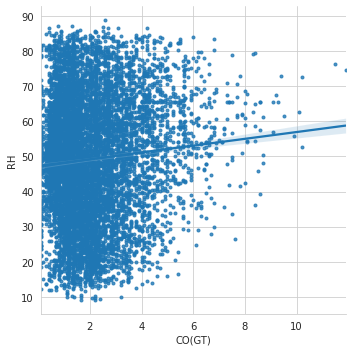

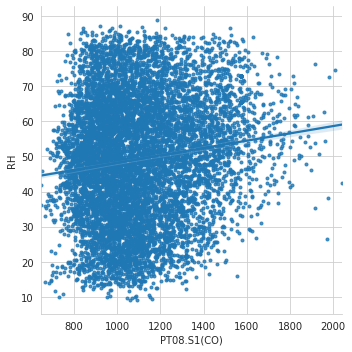

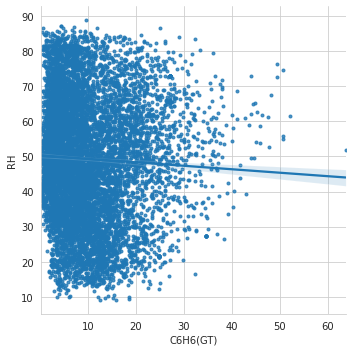

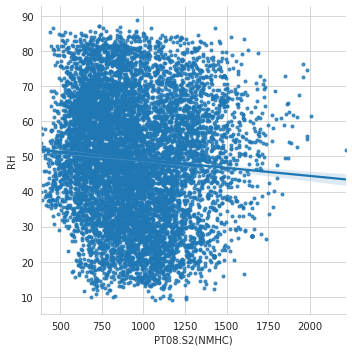

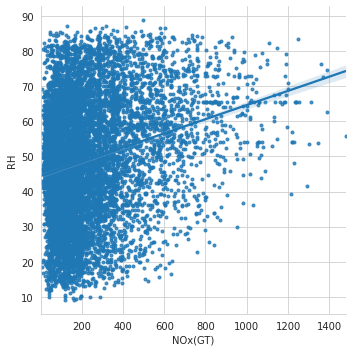

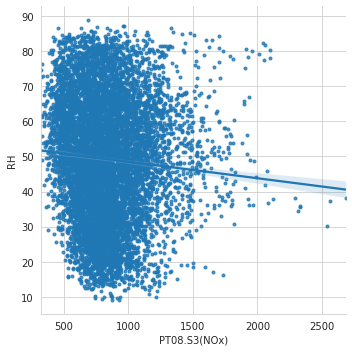

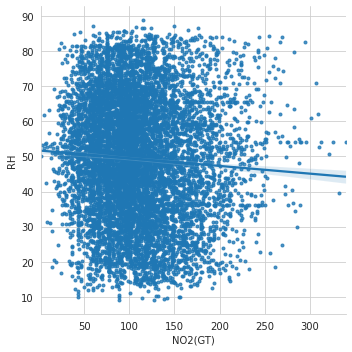

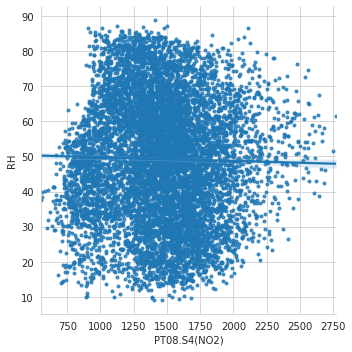

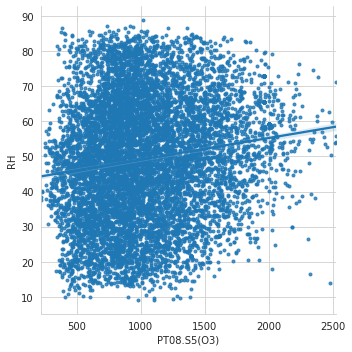

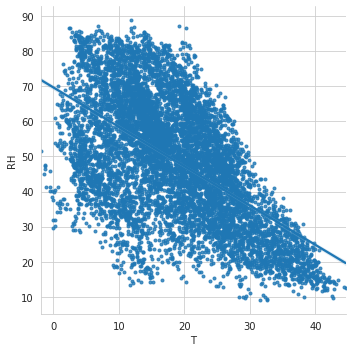

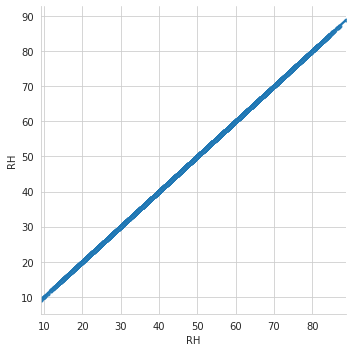

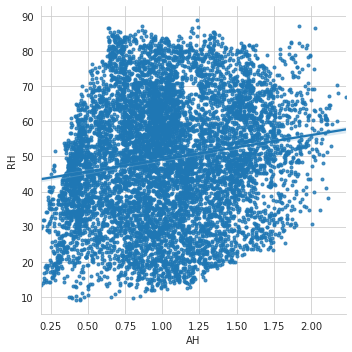

In [81]:
col_= data.columns[2:-3]
print(col_)
print(data.columns)
for i in col_:
    sns.lmplot(x=i,y='RH',data=data,markers='.')

In [82]:
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [84]:
y = data[['RH','AH']]
drop_data= data.drop(['RH','AH'],axis=1)
x = drop_data.iloc[:,2:-3]

In [85]:
ss = StandardScaler()
x_std = ss.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x2 = sm.add_constant(x_train)
est = sm.OLS(y_train.iloc[:,0],x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     RH   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     2346.
Date:                Fri, 28 Aug 2020   Prob (F-statistic):               0.00
Time:                        03:33:50   Log-Likelihood:                -22932.
No. Observations:                6549   AIC:                         4.589e+04
Df Residuals:                    6538   BIC:                         4.596e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            84.1017      2.319     36.265

In [86]:
z2 = sm.add_constant(x_train)
mst = sm.OLS(y_train.iloc[:,1],z2)
mst2 = mst.fit()
print(mst2.summary())

                            OLS Regression Results                            
Dep. Variable:                     AH   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     3267.
Date:                Fri, 28 Aug 2020   Prob (F-statistic):               0.00
Time:                        03:35:35   Log-Likelihood:                 2503.2
No. Observations:                6549   AIC:                            -4984.
Df Residuals:                    6538   BIC:                            -4910.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.4978      0.048     31.396

Text(0, 0.5, 'Residuals')

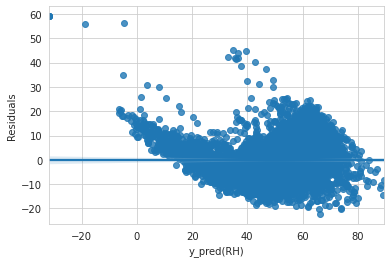

In [88]:
x3 = sm.add_constant(x_train)
y_train_pred1 = est2.predict(x3)
resid1 = (y_train.iloc[:,0] - y_train_pred1)
sns.regplot(y_train_pred1,resid1)
plt.xlabel("y_pred(RH)")
plt.ylabel("Residuals")


Text(0, 0.5, 'Residuals')

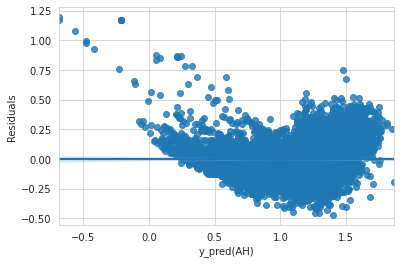

In [90]:
z3 = sm.add_constant(x_train)
y_train_pred2 = mst2.predict(z3)
resid2 = (y_train.iloc[:,1] - y_train_pred2)
sns.regplot(y_train_pred2,resid2)
plt.xlabel("y_pred(AH)")
plt.ylabel("Residuals")

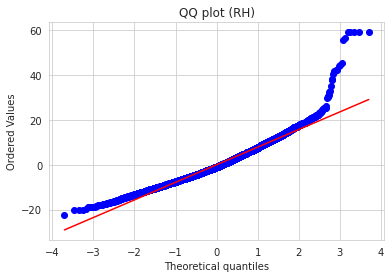

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [91]:
import pylab
stats.probplot(resid1, dist="norm", plot=pylab)
pylab.title("QQ plot (RH)")
pylab.show()
pylab.figure()

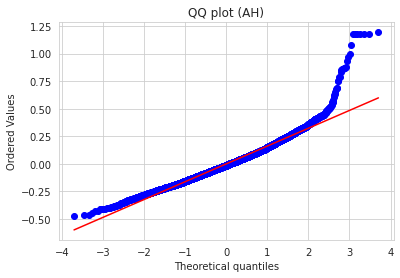

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [92]:
import pylab
stats.probplot(resid2, dist="norm", plot=pylab)
pylab.title("QQ plot (AH)")
pylab.show()
pylab.figure()

In [93]:
from statsmodels.tsa.stattools import adfuller
def adfu(ts):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, autolag = 'AIC')
    rolling_mean = ts.rolling(window = 24).mean()
    rolling_std = ts.rolling(window = 24).std()


    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

adfu(y.iloc[:,0])
adfu(y.iloc[:,1])

Results of Dickey-Fuller Test:
Test Statistic                -7.281607e+00
p-value                        1.495339e-10
#Lags Used                     3.800000e+01
Number of Observations Used    9.318000e+03
Critical Value (1%)           -3.431052e+00
Critical Value (5%)           -2.861850e+00
Critical Value (10%)          -2.566935e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                   -5.141627
p-value                           0.000012
#Lags Used                       25.000000
Number of Observations Used    9331.000000
Critical Value (1%)              -3.431051
Critical Value (5%)              -2.861850
Critical Value (10%)             -2.566935
dtype: float64


In [94]:
from statsmodels.tsa.stattools import acf, pacf
def drawAcf(indexedData_AH):
  lag_acf = acf(indexedData_AH, nlags=20)
  lag_pacf = pacf(indexedData_AH, nlags=20, method='ols')
  #Plot ACF: 
  #plt.subplot(121) 
  plt.plot(lag_acf)
  plt.axhline(y=0,linestyle='--',color='gray')
  plt.axhline(y=-1.96/np.sqrt(len(indexedData_AH)),linestyle='--',color='gray')
  plt.axhline(y=1.96/np.sqrt(len(indexedData_AH)),linestyle='--',color='gray')
  plt.title('Autocorrelation Function')
  plt.show()
  #Plot PACF:
  #plt.subplot(122)
  plt.plot(lag_pacf)
  plt.axhline(y=0,linestyle='--',color='gray')
  plt.axhline(y=-1.96/np.sqrt(len(indexedData_AH)),linestyle='--',color='gray')
  plt.axhline(y=1.96/np.sqrt(len(indexedData_AH)),linestyle='--',color='gray')
  plt.title('Partial Autocorrelation Function')
  plt.show()

In [102]:
data.info()

AttributeError: ignored

In [101]:
data.dropna(axis=0)
df = data.copy()
datetime = pd.Series(df.DateTime)
df.index = datetime

df.columns = ["V"+str(i) for i in range(1, len(df.columns)+1)]

data = df.V13
data1=df.V14
df['V14log'] = np.log(df.V13)
df["V14LogShi1"] = df.V14log.shift()
df = df.fillna(0)
df["Diff"] = df.V14log - df.V14LogShi1
ts_diff = df.Diff
ts_diff.dropna(inplace = True)




from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
#Plot ACF: 
#plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()
#Plot PACF:
#plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()
# #p=2 q=1



from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_diff, order=(3,1,5))  
results_ARIMA = model.fit(disp=-1) 
plt.figure(figsize=(15,10))
plt.plot(ts_diff)
plt.title("original vs fitted value of RH")
plt.plot(results_ARIMA.fittedvalues, color='green')


AttributeError: ignored